<a href="https://colab.research.google.com/github/Gabo-always-learning/Base-de-Datos/blob/main/T03-UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Instalación (ejecutar una sola vez)
!pip install umap-learn numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap

# Ejercicio 1

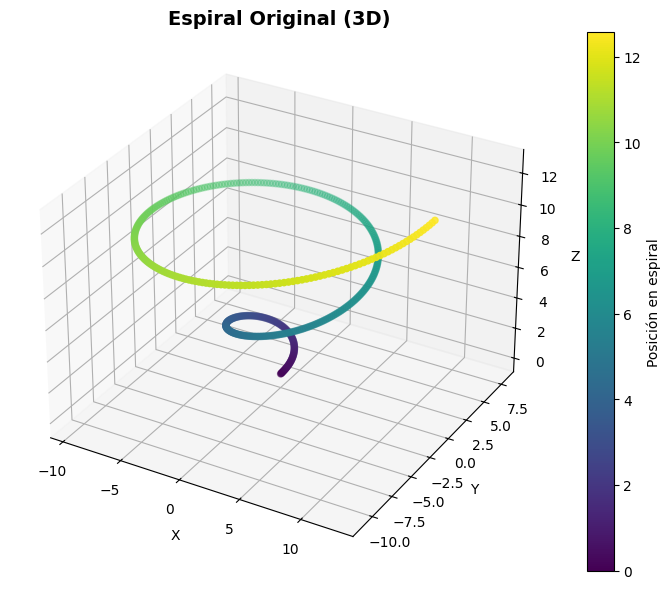

In [3]:
# Generar espiral 3D
n_points = 500
t = np.linspace(0, 4*np.pi, n_points)
x = t * np.cos(t)
y = t * np.sin(t)
z = t
spiral_3d = np.column_stack([x, y, z])

# Colorear por posición en el espiral (para seguir el flujo)
colors = t

# Visualizar en 3D
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=colors, cmap='viridis', s=20)
ax1.set_title('Espiral Original (3D)', fontsize=14, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.colorbar(scatter1, ax=ax1, label='Posición en espiral')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


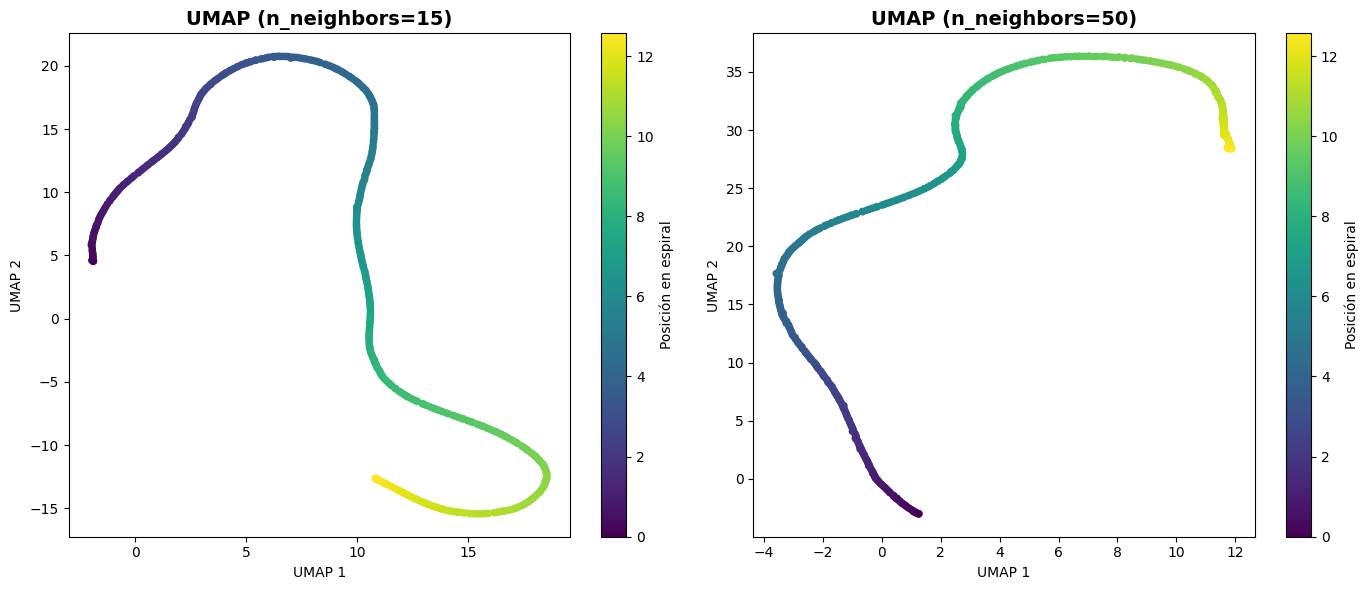

In [4]:
#FIGURA PARA 2D
fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(14, 6))

# UMAP con n_neighbors=15
reducer1 = umap.UMAP(n_neighbors=15, random_state=42)
embedding1 = reducer1.fit_transform(spiral_3d)

scatter2 = ax2.scatter(embedding1[:, 0], embedding1[:, 1], c=colors, cmap='viridis', s=20)
ax2.set_title('UMAP (n_neighbors=15)', fontsize=14, fontweight='bold')
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
plt.colorbar(scatter2, ax=ax2, label='Posición en espiral')

# UMAP con n_neighbors=50
reducer2 = umap.UMAP(n_neighbors=50, random_state=42)
embedding2 = reducer2.fit_transform(spiral_3d)

scatter3 = ax3.scatter(embedding2[:, 0], embedding2[:, 1], c=colors, cmap='viridis', s=20)
ax3.set_title('UMAP (n_neighbors=50)', fontsize=14, fontweight='bold')
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')
plt.colorbar(scatter3, ax=ax3, label='Posición en espiral')

plt.tight_layout()
plt.show()

### **PREGUNTA:** ¿Qué diferencia observas entre `n_neighbors=15` y `n_neighbors=50`?





**RESPUESTA:**

In [ ]:
# Realmente creo que conserva bien el orden, conservan bien la continuidad, lo que podria decir es que cambia la forma,

# Ejercicio 2

In [5]:
# Generar muestra densa del espacio RGB
n_per_dim = 10
r = np.linspace(0, 1, n_per_dim)
g = np.linspace(0, 1, n_per_dim)
b = np.linspace(0, 1, n_per_dim)

# Crear grid 3D de colores
R, G, B = np.meshgrid(r, g, b)
colors_rgb = np.column_stack([R.ravel(), G.ravel(), B.ravel()])

print(f"Total de colores: {len(colors_rgb)}")

Total de colores: 1000


In [6]:
# Aplicar UMAP
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(colors_rgb)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


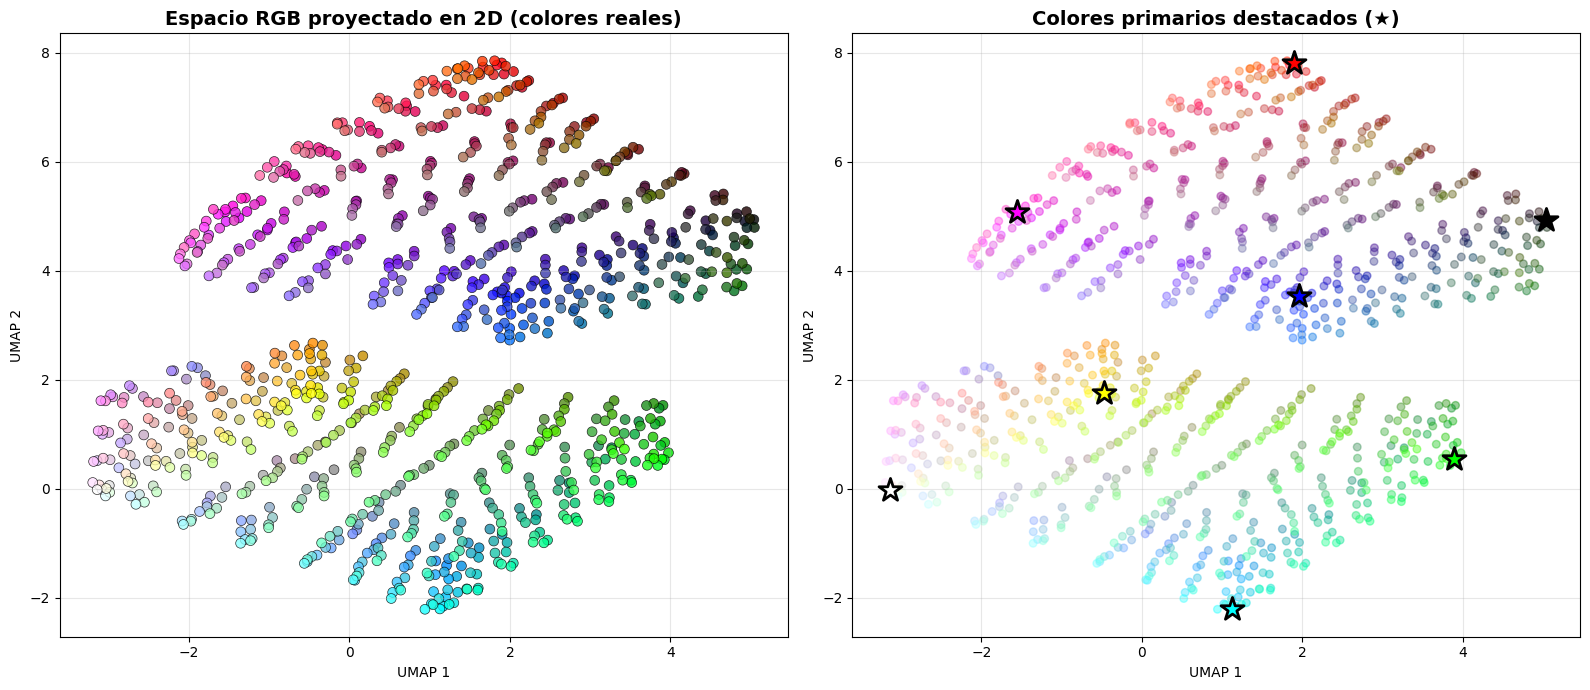

In [7]:
# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Embedding coloreado por RGB real
axes[0].scatter(embedding[:, 0], embedding[:, 1],
                c=colors_rgb, s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
axes[0].set_title('Espacio RGB proyectado en 2D (colores reales)',
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].grid(True, alpha=0.3)

# Plot 2: Destacar colores primarios
primary_colors = np.array([
    [1, 0, 0],  # Rojo
    [0, 1, 0],  # Verde
    [0, 0, 1],  # Azul
    [1, 1, 0],  # Amarillo
    [1, 0, 1],  # Magenta
    [0, 1, 1],  # Cian
    [0, 0, 0],  # Negro
    [1, 1, 1],  # Blanco
])

axes[1].scatter(embedding[:, 0], embedding[:, 1],
                c=colors_rgb, s=30, alpha=0.4)

# Encontrar y marcar colores primarios
for i, pc in enumerate(primary_colors):
    idx = np.argmin(np.sum((colors_rgb - pc)**2, axis=1))
    axes[1].scatter(embedding[idx, 0], embedding[idx, 1],
                   c=[pc], s=300, marker='*',
                   edgecolors='black', linewidth=2, zorder=5)

color_names = ['Rojo', 'Verde', 'Azul', 'Amarillo', 'Magenta', 'Cian', 'Negro', 'Blanco']
axes[1].set_title('Colores primarios destacados (★)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **PREGUNTA:** ¿Los colores complementarios están cerca o lejos en la proyección? En cada caso, ¿por qué?

**RESPUESTA:**

In [ ]:
#El color blanco y negro sí están lejos, porque los vecinos más cercanos del blanco son colores muy claros, mientras que en el negro los vecinos son colores oscuros.

#El color rojo y cian también están lejos porque en el espacio perceptual estos colores están opuestos:
#el rojo tiene como vecinos tonos cálidos y el cian tiene vecinos fríos.
#UMAP no los pone cerca porque no tienen los mismos vecinos.

#El color azul y amarillo también están relativamente lejos, no tanto como blanco y negro, pero sí aparecen en clusters distintos. Esto pasa porque el azul es vecino de colores fríos y el amarillo de colores cálidos y claros,

# Ejercicio 3

In [4]:
from sklearn.datasets import make_circles


In [5]:
# Generar datos estructurados (círculos concéntricos)
n_structured = 400
X_circles, y_circles = make_circles(n_samples=n_structured, noise=0.05,
                                     factor=0.5, random_state=42)

# Generar ruido puro (sin estructura)
n_noise = 200
X_noise = np.random.randn(n_noise, 2) * 0.5

# Combinar datos
X_combined = np.vstack([X_circles, X_noise])
labels = np.array(['Círculo Ext']*200 + ['Círculo Int']*200 + ['Ruido']*200)
colors_map = {'Círculo Ext': 'red', 'Círculo Int': 'blue', 'Ruido': 'gray'}
colors = [colors_map[l] for l in labels]

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


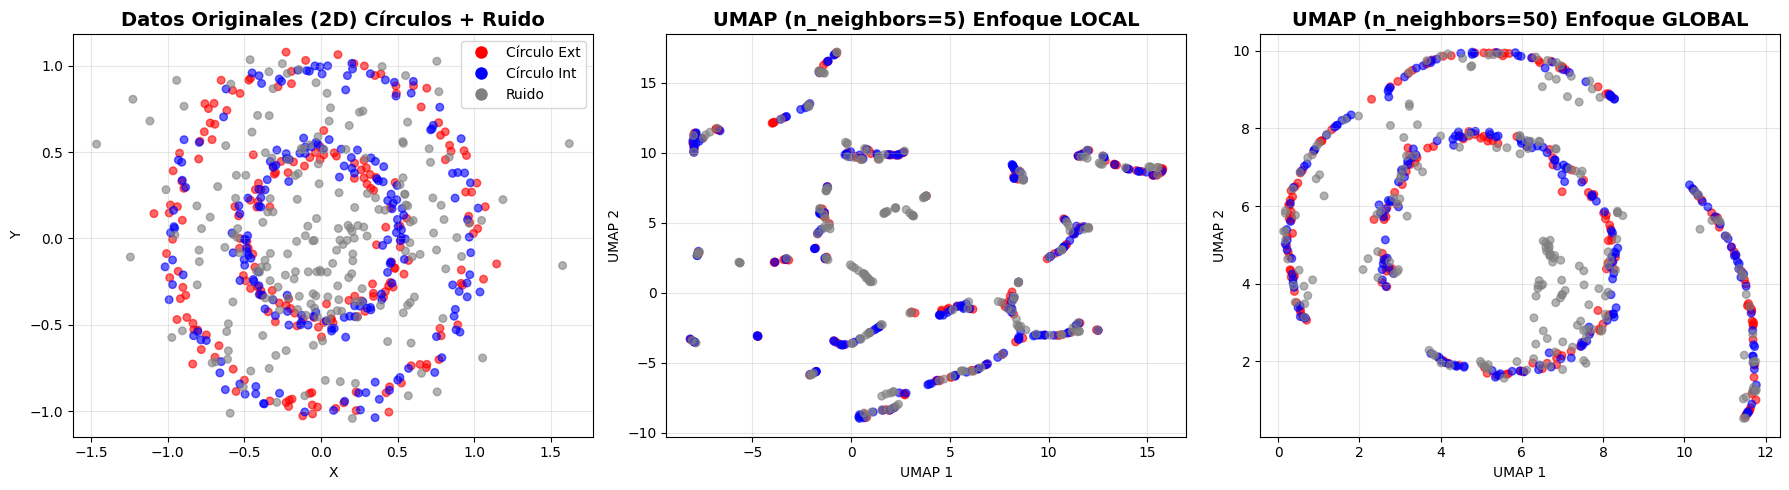

In [6]:
# Visualizar datos originales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_combined[:, 0], X_combined[:, 1], c=colors, s=30, alpha=0.6)
axes[0].set_title('Datos Originales (2D) Círculos + Ruido',
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)
axes[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=c, markersize=10, label=l)
               for l, c in colors_map.items()])

# UMAP con n_neighbors pequeño (enfoque local)
reducer_local = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=42)
embedding_local = reducer_local.fit_transform(X_combined)

axes[1].scatter(embedding_local[:, 0], embedding_local[:, 1],
                c=colors, s=30, alpha=0.6)
axes[1].set_title('UMAP (n_neighbors=5) Enfoque LOCAL',
                   fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)

# UMAP con n_neighbors grande (enfoque global)
reducer_global = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=42)
embedding_global = reducer_global.fit_transform(X_combined)

axes[2].scatter(embedding_global[:, 0], embedding_global[:, 1],
                c=colors, s=30, alpha=0.6)
axes[2].set_title('UMAP (n_neighbors=50) Enfoque GLOBAL',
                   fontsize=14, fontweight='bold')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**PREGUNTA:** ¿El ruido se mezcla con los círculos o se separa? ¿Por qué?

**RESPUESTA:**

In [ ]:
# Se separan los puntos en el ruido más aislados porque la relación de vecinos no es simétrica, Si estan muy lejos, ellos no son vecinos cercanos de sus vecinos cercanos, entonces UMAP no los junta.

# Ejercicio 4

In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [8]:
# Cargar dataset de dígitos (versión pequeña de MNIST)
digits = load_digits()
X = digits.data  # 1797 imágenes de 8x8 = 64 píxeles
y = digits.target  # Etiquetas 0-9

print(f"Datos: {X.shape[0]} imágenes de {X.shape[1]} píxeles")
print(f"Dígitos: {np.unique(y)}")

Datos: 1797 imágenes de 64 píxeles
Dígitos: [0 1 2 3 4 5 6 7 8 9]


In [9]:
# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Aplicar UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1,
                     metric='euclidean', random_state=42)
embedding = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


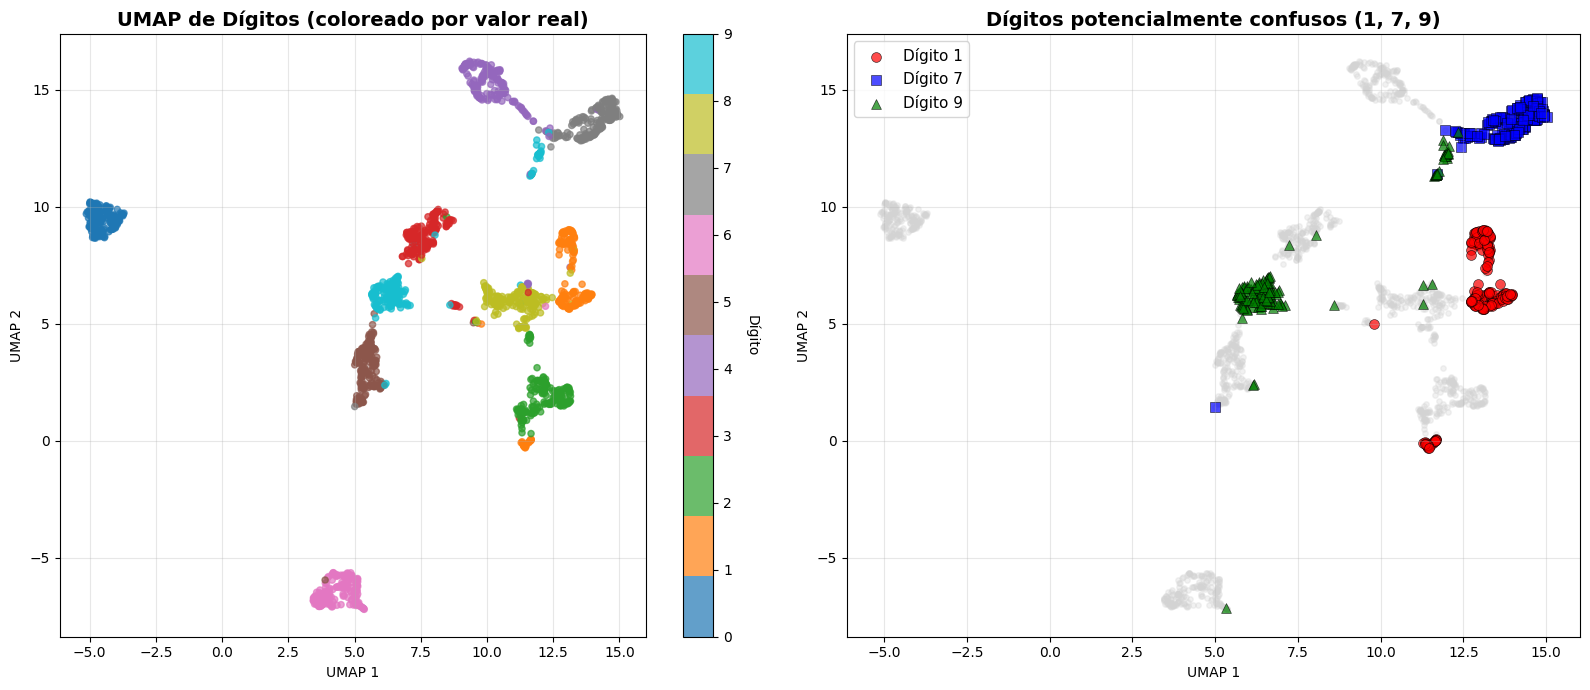

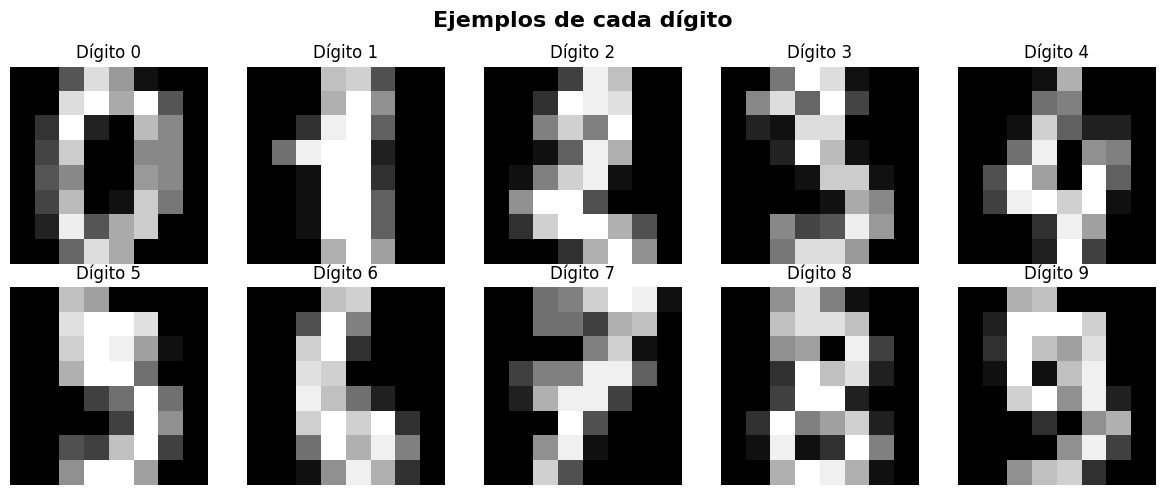

In [11]:
# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Coloreado por dígito
scatter1 = axes[0].scatter(embedding[:, 0], embedding[:, 1],
                           c=y, cmap='tab10', s=20, alpha=0.7)
axes[0].set_title('UMAP de Dígitos (coloreado por valor real)',
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Dígito', rotation=270, labelpad=20)
axes[0].grid(True, alpha=0.3)

# Plot 2: Destacar confusiones comunes
axes[1].scatter(embedding[:, 0], embedding[:, 1],
                c='lightgray', s=15, alpha=0.3)

# Destacar 1, 7 y 9 (a menudo confundidos)
for digit, color, marker in [(1, 'red', 'o'), (7, 'blue', 's'), (9, 'green', '^')]:
    mask = y == digit
    axes[1].scatter(embedding[mask, 0], embedding[mask, 1],
                   c=color, s=50, alpha=0.7, marker=marker,
                   label=f'Dígito {digit}', edgecolors='black', linewidth=0.5)

axes[1].set_title('Dígitos potencialmente confusos (1, 7, 9)',
                   fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar algunos ejemplos de cada cluster
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Ejemplos de cada dígito', fontsize=16, fontweight='bold')

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    mask = y == digit
    idx = np.where(mask)[0][0]
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title(f'Dígito {digit}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

**PREGUNTA:** ¿A qué se debe este resultado de la proyección de UMAP? ¿Qué dígitos están más cerca entre sí? ¿Coincide con tu intuición?



**RESPUESTA:**


In [12]:
#1- UMAP se está fijando en la instensidad de los tonos de grises pixel por pixel,
# entonces dos números estarán muy cercanos si el color de los pixeles se asemejan más a lo largo de la imagen,

#2- El 5 y el 9, tiene sentido dado que con tan poca resulución sus trazos pasan por las mismas casillas.
#Tambien podríamos decir que el 8 y el 1, pasa algo similara, cubren muchas casillas de las columnas de en medio

#3- Inicialmente no, pero después del ejemplo me hace sentido que sea así.

# Ejercicio 5

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


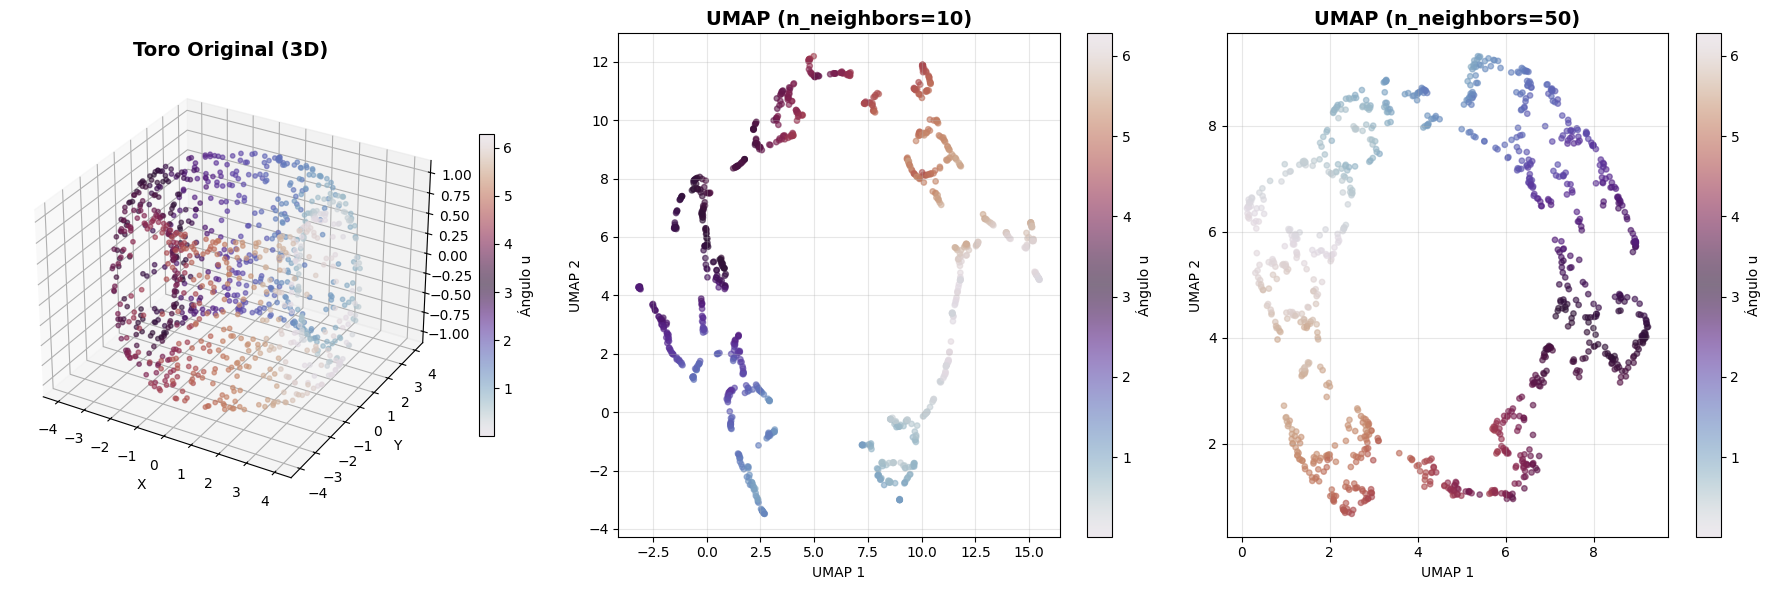

In [14]:
# Generar toro (dona) en 3D
n_points = 1000
R = 3  # Radio mayor
r = 1  # Radio menor

# Ángulos
u = np.random.uniform(0, 2*np.pi, n_points)
v = np.random.uniform(0, 2*np.pi, n_points)

# Ecuaciones paramétricas del toro
x = (R + r*np.cos(v)) * np.cos(u)
y = (R + r*np.cos(v)) * np.sin(u)
z = r * np.sin(v)

torus_3d = np.column_stack([x, y, z])

# Colores basados en ángulos (para seguir la topología)
colors = u

# Visualizar
fig = plt.figure(figsize=(18, 6))

# Plot 3D
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=colors, cmap='twilight', s=10, alpha=0.6)
ax1.set_title('Toro Original (3D)', fontsize=14, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.colorbar(scatter1, ax=ax1, label='Ángulo u', shrink=0.6)

# UMAP con diferentes n_neighbors
for i, n_neigh in enumerate([10, 50], start=2):
    reducer = umap.UMAP(n_neighbors=n_neigh, min_dist=0.0, random_state=42)
    embedding = reducer.fit_transform(torus_3d)

    ax = fig.add_subplot(1, 3, i)
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
                        c=colors, cmap='twilight', s=15, alpha=0.6)
    ax.set_title(f'UMAP (n_neighbors={n_neigh})', fontsize=14, fontweight='bold')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    plt.colorbar(scatter, ax=ax, label='Ángulo u')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Análisis de distorsión
print("ANÁLISIS DE DISTORSIÓN:")
print("="*50)

# Calcular matriz de distancias en 3D (muestra pequeña para eficiencia)
sample_indices = np.random.choice(len(torus_3d), 200, replace=False)
torus_sample = torus_3d[sample_indices]

dist_3d = squareform(pdist(torus_sample))

# Proyectar muestra
reducer = umap.UMAP(n_neighbors=30, random_state=42)
embedding_sample = reducer.fit_transform(torus_sample)
dist_2d = squareform(pdist(embedding_sample))

# Correlación de distancias
from scipy.stats import spearmanr
correlation = spearmanr(dist_3d.ravel(), dist_2d.ravel())[0]

print(f"Correlación de Spearman: {correlation:.3f}")
print(f"Interpretación: {'Excelente' if correlation > 0.9 else 'Buena' if correlation > 0.7 else 'Moderada'} preservación de distancias")

ANÁLISIS DE DISTORSIÓN:


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Correlación de Spearman: 0.952
Interpretación: Excelente preservación de distancias


**PREGUNTA:** ¿Es posible aplanar un toro sin distorsión? ¿Por qué? ¿Qué hace UMAP?

**RESPUESTA:**

In [ ]:
#

# EJERCICIO 6

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Generar datos con 4 clusters claros
X, y = make_blobs(n_samples=400, n_features=10, centers=4,
                  cluster_std=1.0, random_state=42)

print(f"Datos: {X.shape[0]} puntos en {X.shape[1]} dimensiones")
print(f"Clusters: {len(np.unique(y))}")

In [ ]:
# Ejecutar UMAP con 4 semillas diferentes
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.ravel()

seeds = [42, 123, 456, 789]
embeddings = []

for i, seed in enumerate(seeds):
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=seed)
    embedding = reducer.fit_transform(X)
    embeddings.append(embedding)

    scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1],
                             c=y, cmap='tab10', s=30, alpha=0.7)
    axes[i].set_title(f'UMAP con semilla={seed}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')
    axes[i].grid(True, alpha=0.3)

    if i == 0:
        plt.colorbar(scatter, ax=axes[i], label='Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Análisis de estabilidad
print("\n📊 ANÁLISIS DE ESTABILIDAD:")
print("="*50)

# Calcular centroides de clusters para cada embedding
from scipy.spatial.distance import cdist

centroids_list = []
for emb in embeddings:
    centroids = np.array([emb[y == i].mean(axis=0) for i in range(4)])
    centroids_list.append(centroids)

# Comparar posiciones relativas de centroides
print("\nDistancias entre centroides (promedio entre semillas):")
for i in range(4):
    for j in range(i+1, 4):
        distances = [np.linalg.norm(cent[i] - cent[j]) for cent in centroids_list]
        print(f"  Cluster {i} - Cluster {j}: {np.mean(distances):.2f} ± {np.std(distances):.2f}")

# Verificar preservación de vecindarios
from sklearn.neighbors import NearestNeighbors

print("\nPreservación de 10-vecinos más cercanos:")
nbrs_original = NearestNeighbors(n_neighbors=11).fit(X)
_, indices_original = nbrs_original.kneighbors(X)

for i, (emb, seed) in enumerate(zip(embeddings, seeds)):
    nbrs_embedded = NearestNeighbors(n_neighbors=11).fit(emb)
    _, indices_embedded = nbrs_embedded.kneighbors(emb)

    # Calcular overlap de vecinos
    overlap = 0
    for orig, embed in zip(indices_original, indices_embedded):
        overlap += len(set(orig) & set(embed))

    overlap_ratio = overlap / (len(X) * 11)
    print(f"  Semilla {seed}: {overlap_ratio:.1%} de vecinos preservados")

**PREGUNTA:** ¿Los clusters están siempre en las mismas posiciones? ¿Hay algo que cambia? Explica

**RESPUESTA:**

In [ ]:
#

# Ejercicio 7

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Generar datos con overlap entre clases (difícil de separar)
X, y = make_classification(n_samples=800, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=4, n_clusters_per_class=2,
                           class_sep=0.5, random_state=42)

print(f"Datos: {X.shape[0]} puntos en {X.shape[1]} dimensiones")
print(f"Clases: {np.unique(y)}")

In [ ]:
# Split para evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. UMAP No Supervisado (sin usar etiquetas)
print("\n1️⃣ Aplicando UMAP No Supervisado...")
reducer_unsup = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding_unsup = reducer_unsup.fit_transform(X)

In [ ]:
# 2. UMAP Supervisado (usando etiquetas)
print("2️⃣ Aplicando UMAP Supervisado...")
reducer_sup = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding_sup = reducer_sup.fit_transform(X, y=y)

In [ ]:
# 3. UMAP Semi-supervisado (mezcla: 50% peso a etiquetas)
print("3️⃣ Aplicando UMAP Semi-supervisado...")
reducer_semi = umap.UMAP(n_neighbors=15, min_dist=0.1,
                         target_weight=0.5, random_state=42)
embedding_semi = reducer_semi.fit_transform(X, y=y)

In [ ]:
# Visualizar
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ['UMAP No Supervisado\n(sin etiquetas)',
          'UMAP Semi-supervisado\n(50% etiquetas)',
          'UMAP Supervisado\n(100% etiquetas)']
embeddings = [embedding_unsup, embedding_semi, embedding_sup]

for ax, emb, title in zip(axes, embeddings, titles):
    scatter = ax.scatter(emb[:, 0], emb[:, 1], c=y, cmap='tab10',
                        s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Clase')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar utilidad para clasificación
print("\n📊 EVALUACIÓN DE CLASIFICACIÓN (k-NN con k=5):")
print("="*60)

for name, emb in [("No Supervisado", embedding_unsup),
                   ("Semi-supervisado", embedding_semi),
                   ("Supervisado", embedding_sup)]:
    # Entrenar clasificador en embedding
    emb_train = emb[:len(X_train)]
    emb_test = emb[len(X_train):]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(emb_train, y_train)
    y_pred = knn.predict(emb_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name:20s}: {acc:.1%} de precisión")

**PREGUNTA:** ¿Por qué UMAP supervisado tiene mejor precisión?"

**RESPUESTA:**

In [ ]:
#

# Ejercicio 8

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

In [ ]:
# Generar Swiss Roll (manifold clásico)
n_samples = 1500
X, color = make_swiss_roll(n_samples=n_samples, noise=0.1, random_state=42)

print(f"Swiss Roll: {n_samples} puntos en 3D")
print(f"Forma: {X.shape}")

In [ ]:
# Visualizar Swiss Roll original
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=color, cmap='viridis', s=20, alpha=0.6)
ax.set_title('Swiss Roll Original (3D)', fontsize=16, fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(scatter, ax=ax, label='Posición en rollo', shrink=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Aplicar diferentes métodos
print("\n1️⃣ Aplicando PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("2️⃣ Aplicando t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

print("3️⃣ Aplicando UMAP...")
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X)

In [ ]:
# Visualizar comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

methods = [('PCA (Lineal)', X_pca), ('t-SNE (Probabilístico)', X_tsne), ('UMAP (Topológico)', X_umap)]

for ax, (title, embedding) in zip(axes, methods):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
                        c=color, cmap='viridis', s=20, alpha=0.7)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Posición original')

plt.tight_layout()
plt.show()

In [ ]:
# Análisis cuantitativo: preservación de distancias
print("\n📊 ANÁLISIS DE PRESERVACIÓN DE DISTANCIAS:")
print("="*60)

# Muestra para eficiencia
sample_idx = np.random.choice(n_samples, 300, replace=False)
X_sample = X[sample_idx]
color_sample = color[sample_idx]

# Distancias originales
dist_original = squareform(pdist(X_sample))

for name, method in [('PCA', pca), ('t-SNE', None), ('UMAP', reducer)]:
    if name == 't-SNE':
        # t-SNE ya fue calculado
        embedding_sample = X_tsne[sample_idx]
    elif name == 'PCA':
        embedding_sample = pca.transform(X_sample)
    else:  # UMAP
        embedding_sample = reducer.transform(X_sample)

    dist_embedded = squareform(pdist(embedding_sample))

    # Correlación de Spearman (preservación de orden de distancias)
    corr = spearmanr(dist_original.ravel(), dist_embedded.ravel())[0]

    print(f"{name:10s}: Correlación = {corr:.3f} ", end="")

    if corr > 0.8:
        print("Excelente")
    elif corr > 0.6:
        print("Buena")
    else:
        print("Pobre")

print("\nINSIGHT:")
print("   PCA falla porque el Swiss Roll es NO LINEAL")
print("   t-SNE preserva estructura local pero distorsiona global")
print("   UMAP balancea ambos: local + global")

**PREGUNTA:** Sabiendo que Swiss Roll es no lineal y que PCA es una algoritmo lineal ¿Por qué PCA no puede desenrollar el Swiss Roll? ¿Por qué t-SNE en general distorsiona la estructura global de Swiss Roll?

**RESPUESTA:**

In [ ]:
#

# Ejercicio 9

In [ ]:
from sklearn.datasets import make_s_curve

In [ ]:
# Generar S-Curve (manifold 2D en 3D)
n_samples = 1000
X, color = make_s_curve(n_samples=n_samples, noise=0.05, random_state=42)
print(f"S-Curve: {n_samples} puntos en 3D")

In [ ]:
# Visualizar S-Curve original
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=color, cmap='plasma', s=20, alpha=0.6)
ax.set_title('S-Curve Original (3D)', fontsize=16, fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=10, azim=70)
plt.colorbar(scatter, ax=ax, label='Posición en curva', shrink=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# PASO 1: Proyección 3D → 2D con UMAP
print("\n1️⃣ Proyectando 3D → 2D...")
reducer_forward = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
X_2d = reducer_forward.fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=color, cmap='plasma', s=30, alpha=0.7)
ax.set_title('Proyección UMAP 2D', fontsize=14, fontweight='bold')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Posición original')
plt.tight_layout()
plt.show()

In [ ]:
# PASO 2: Inversión 2D → 3D con UMAP inverso
print("2️⃣ Entrenando UMAP inverso 2D → 3D...")
reducer_inverse = umap.UMAP(n_neighbors=30, n_components=3,
                            min_dist=0.1, random_state=42)
X_reconstructed = reducer_inverse.fit_transform(X_2d)

# Visualizar reconstrucción
fig = plt.figure(figsize=(16, 7))

# Original
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2],
                       c=color, cmap='plasma', s=20, alpha=0.6)
ax1.set_title('Original 3D', fontsize=14, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=10, azim=70)
plt.colorbar(scatter1, ax=ax1, label='Color', shrink=0.6)

# Reconstruido
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2],
                       c=color, cmap='plasma', s=20, alpha=0.6)
ax2.set_title('Reconstruido desde 2D → 3D', fontsize=14, fontweight='bold')
ax2.set_xlabel('X\'')
ax2.set_ylabel('Y\'')
ax2.set_zlabel('Z\'')
ax2.view_init(elev=10, azim=70)
plt.colorbar(scatter2, ax=ax2, label='Color', shrink=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# Análisis de error de reconstrucción
print("\n📊 ANÁLISIS DE RECONSTRUCCIÓN:")
print("="*60)

# Normalizar ambos para comparar (pueden tener escalas diferentes)
from sklearn.preprocessing import StandardScaler

scaler_orig = StandardScaler()
scaler_recon = StandardScaler()

X_norm = scaler_orig.fit_transform(X)
X_recon_norm = scaler_recon.fit_transform(X_reconstructed)

# Error por punto
errors = np.linalg.norm(X_norm - X_recon_norm, axis=1)
mean_error = np.mean(errors)
median_error = np.median(errors)

print(f"Error medio de reconstrucción: {mean_error:.3f}")
print(f"Error mediano: {median_error:.3f}")
print(f"Error máximo: {np.max(errors):.3f}")
print(f"Error mínimo: {np.min(errors):.3f}")

# Visualizar distribución de errores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de errores
axes[0].hist(errors, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(mean_error, color='red', linestyle='--', linewidth=2, label=f'Media = {mean_error:.3f}')
axes[0].axvline(median_error, color='green', linestyle='--', linewidth=2, label=f'Mediana = {median_error:.3f}')
axes[0].set_xlabel('Error de Reconstrucción', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Errores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Puntos coloreados por error
scatter = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=errors,
                         cmap='YlOrRd', s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[1].set_title('Puntos coloreados por Error de Reconstrucción', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Error', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT:")
print("   La reconstrucción NO es perfecta (imposible sin pérdida)")
print("   Pero la FORMA general se preserva")
print("   Útil para: compresión, denoising, imputación de datos")

**PREGUNTA:** ¿Por qué no podemos recuperar de manera exacta los datos originales?

**RESPUESTA:**

In [ ]:
#

# Ejercicio 10*

INSTRUCCIONES GENERALES:

- Completa cada ejercicio siguiendo las indicaciones
- Ejecuta las celdas en orden secuencial
- Responde las preguntas conceptuales en los espacios indicados

In [ ]:
# Instalación y carga de librerías necesarias
!pip install umap-learn -q

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.neighbors import NearestNeighbors
import umap
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
np.set_printoptions(precision=3, suppress=True)

## PARTE 1
DATOS ORIGINALES Y EXPLORACIÓN

In [ ]:
# Definición de los datos
X = np.array([
    # Cluster A
    [0.0, 0.0, 0.0],    # x1
    [0.2, 0.1, 0.1],    # x2
    [0.1, 0.3, 0.0],    # x3
    [0.3, 0.2, 0.2],    # x4
    # Cluster B
    [5.0, 0.0, 0.0],    # x5
    [5.2, 0.1, 0.1],    # x6
    [5.1, 0.2, 0.0],    # x7
    [4.9, 0.1, 0.2],    # x8
    # Cluster C
    [2.5, 4.0, 0.0],    # x9
    [2.6, 4.1, 0.1]     # x10
])

labels = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2])
cluster_names = ['Cluster A', 'Cluster B', 'Cluster C']
n_points = X.shape[0]

print(f"\nDatos cargados: {n_points} puntos en R^3")
print(f"Clusters identificados: {len(np.unique(labels))}")

In [ ]:
# Visualización 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']

for i, (label, color, marker, name) in enumerate(zip(np.unique(labels), colors, markers, cluster_names)):
    mask = labels == label
    ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2],
               c=color, marker=marker, s=100, label=name, alpha=0.7, edgecolors='black')

    # Etiquetas de puntos
    for j, point in enumerate(X[mask]):
        idx = np.where(mask)[0][j]
        ax.text(point[0], point[1], point[2], f'  $x_{{{idx+1}}}$', fontsize=9)

ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_zlabel('Z', fontsize=11)
ax.set_title('Datos Originales en R^3', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True)
plt.tight_layout()
plt.show()

* **EJERCICIO 1.1: Análisis de Distancias**

In [ ]:
# Matriz de distancias euclidianas
dist_matrix = squareform(pdist(X, metric='euclidean'))

print("\nMatriz de Distancias Euclidianas (10x10):")
print(pd.DataFrame(dist_matrix, index=[f'x{i+1}' for i in range(n_points)],
                   columns=[f'x{i+1}' for i in range(n_points)]).round(3))

Calcula las distancias anteriores "manualmente" y verifica las entradas de la matriz anterior.

In [ ]:
# Código Ejmplo
d_x1_x2 = np.sqrt((X[0,0] - X[1,0])**2 + (X[0,1] - X[1,1])**2 + (X[0,2] - X[1,2])**2)
print(f"\nd(x1, x2) = {d_x1_x2:.3f}")
print(f"Verificación desde matriz: {dist_matrix[0, 1]:.3f}")
print(f"¿Coinciden? {np.isclose(d_x1_x2, dist_matrix[0, 1])}")

In [ ]:
# Tu código:

*¿Por qué las distancias intra-cluster son mucho menores que las distancias inter-cluster?* Explica en términos de la estructura de los datos originales.

* **EJERCICIO 1.2: Identificación de $k$-Vecinos**

In [ ]:
k = 3  # Número de vecinos

# Encuentra los k vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k+1, metric='euclidean').fit(X)
distances, indices = nbrs.kneighbors(X)

# Excluye el punto mismo (distancia 0)
distances = distances[:, 1:]
indices = indices[:, 1:]

print(f"\nVecinos más cercanos para k={k}:\n")
for i in range(n_points):
    print(f"x{i+1}: ", end="")
    for j, (idx, dist) in enumerate(zip(indices[i], distances[i])):
        print(f"x{idx+1} (d={dist:.3f})", end="  ")
    print()

Calcula cada uno de los $3$-vecinos anteriores "manualmente" y verifica la información de la tabla presentada.

In [ ]:
# Tu código:

*¿Qué observas sobre los vecinos de los puntos del Cluster C? ¿Son todos del mismo cluster? ¿Qué implica esto?*

* **EJERCICIO 1.3: Estadísticas por Cluster**

In [ ]:
def cluster_statistics(X, labels, cluster_id):
    """Calcula estadísticas para un cluster específico"""
    mask = labels == cluster_id
    cluster_points = X[mask]

    # Centroide
    centroid = np.mean(cluster_points, axis=0)

    # Distancias intra-cluster
    if len(cluster_points) > 1:
        intra_dists = pdist(cluster_points, metric='euclidean')
        mean_intra = np.mean(intra_dists)
        std_intra = np.std(intra_dists)
    else:
        mean_intra, std_intra = 0, 0

    return centroid, mean_intra, std_intra

print("\nEstadísticas por cluster:\n")
for i, name in enumerate(cluster_names):
    centroid, mean_dist, std_dist = cluster_statistics(X, labels, i)
    print(f"{name}:")
    print(f"  Centroide: {centroid}")
    print(f"  Distancia intra-cluster promedio: {mean_dist:.3f}")
    print(f"  Desviación estándar: {std_dist:.3f}")
    print()

Calcula las distancias entre centroides

In [ ]:
# Tu código:

## PARTE 2

CONSTRUCCIÓN DE LA REPRESENTACIÓN TOPOLÓGICA DIFUSA

* **EJERCICIO 2.1: Cálculo de $\rho_i$**

In [ ]:
rho = distances[:, 0]  # Distancia al primer vecino más cercano

Tomando en cuenta la celda anterior, imprime el valor de $\rho_{i}$ para cada dato $x_{i}$, con $i=1,\ldots,10$

In [ ]:
# Tu código:

*¿Por qué los puntos del Cluster C tienen valores de ρ similares a los de Clusters A y B, a pesar de estar más aislados? ¿Qué representa realmente ρ_i?*

* **EJERCICIO 2.2: Búsqueda Binaria para $σ_{i}$**

In [ ]:
def compute_sigma(distances_to_neighbors, rho_i, k, target_entropy=None, tol=1e-5, max_iter=64):
    """
    Calcula σ_i usando búsqueda binaria para satisfacer la condición de entropía.

    Parámetros:
    -----------
    distances_to_neighbors : array
        Distancias a los k vecinos más cercanos
    rho_i : float
        Distancia al vecino más cercano
    k : int
        Número de vecinos
    target_entropy : float
        Entropía objetivo (log2(k) por defecto)
    tol : float
        Tolerancia para convergencia
    max_iter : int
        Máximo de iteraciones

    Retorna:
    --------
    sigma : float
        Valor de σ_i que satisface la condición de entropía
    """
    if target_entropy is None:
        target_entropy = np.log2(k)

    # Inicialización
    sigma_low = 1e-10
    sigma_high = 1e10
    sigma_mid = 1.0

    for iteration in range(max_iter):
        # Calcula la suma de pertenencias
        sum_memberships = 0.0
        for dist in distances_to_neighbors:
            effective_dist = max(0, dist - rho_i)
            membership = np.exp(-effective_dist / sigma_mid)
            sum_memberships += membership

        # Verifica convergencia
        if abs(sum_memberships - target_entropy) < tol:
            return sigma_mid

        # Actualiza los límites de búsqueda
        if sum_memberships > target_entropy:
            # σ es muy grande
            sigma_high = sigma_mid
        else:
            # σ es muy pequeño
            sigma_low = sigma_mid

        # Actualiza sigma_mid
        sigma_mid = (sigma_low + sigma_high) / 2.0

    return sigma_mid

Usando la función anterior, calcula $\sigma_{i}$ para cada uno de los puntos $x_{i}$

In [ ]:
# Tu código:

Verifica la condición de entropía para cada $x_{i}$

In [ ]:
# Código ejemplo
sum_check = 0.0
for dist in distances[0]:
    effective_dist = max(0, dist - rho[0])
    sum_check += np.exp(-effective_dist / sigma[0])
print(f"  Suma de pertenencias: {sum_check:.3f}")
print(f"  ¿Satisface la condición? {np.isclose(sum_check, np.log2(k), atol=0.01)}")

In [ ]:
# Tu código:

* **EJERCICIO 2.3: Construcción de la Matriz de Pertenencias Dirigidas**

In [ ]:
V = np.zeros((n_points, n_points))

#for i in range(n_points):
    # Tu código
    # Tu código
    # Tu código
    # Tu código   # Auto-pertenencia

#print("\nMatriz V (Pertenencias Dirigidas) filas/columnas:\n")
#print(pd.DataFrame(V[:10, :10],
#                   index=[f'x{i+1}' for i in range(10)],
#                   columns=[f'x{i+1}' for i in range(10)]).round(3))

Completa el código anterior y construye la matriz $V$ de pertenencias dirigidas. Imprime $V$ de manera análoga al EJERCICIO 1.2

Luego, encuentra un par con alta asimetría e indica sus índices y valores.

In [ ]:
# Tu código

* **EJERCICIO 2.4: Simetrización - Matriz W**

In [ ]:
# TODO: Implementa la unión difusa
def fuzzy_union(V):
    """
    Calcula la unión difusa: w_ij = v_ij + v_ji - v_ij * v_ji

    Parámetros:
    -----------
    V : array (n, n)
        Matriz de pertenencias dirigidas

    Retorna:
    --------
    W : array (n, n)
        Matriz simétrica de pertenencias
    """
    n = V.shape[0]
    W = np.zeros((n, n))

    # Tu código

    #return W

# Calcula W
W = fuzzy_union(V)

print("\nMatriz W (Pertenencias Simétricas) - Muestra:\n")
print(pd.DataFrame(W[:5, :5],
                   index=[f'x{i+1}' for i in range(5)],
                   columns=[f'x{i+1}' for i in range(5)]).round(3))

Completa el código anterior y construye la matriz simétrica $W$ de unión difusa. Imprime $W$ de manera análoga al EJERCICIO 1.2

Luego, verifica que en efecto es una matriz simétrica.

In [ ]:
#Compara los siguientes valores:
print(f"    - Promedio simple: (V[1,2] + V[2,1])/2 = {(V[0,1] + V[1,0])/2:.3f}")
print(f"    - Unión difusa: W[1,2] = {W[0,1]:.3f}")

*¿Por qué UMAP usa unión difusa en lugar de promedio simple? ¿Qué ventaja topológica proporciona?*

## PARTE 3

INICIALIZACIÓN Y OPTIMIZACIÓN

* **EJERCICIO 3.1: Inicialización Espectral con Laplaciano**

In [ ]:
def spectral_initialization(W, n_components=2):
    """
    Inicialización espectral usando el Laplaciano normalizado.

    Parámetros:
    -----------
    W : array (n, n)
        Matriz de pertenencias simétricas
    n_components : int
        Número de dimensiones objetivo

    Retorna:
    --------
    Y_init : array (n, n_components)
        Posiciones iniciales en baja dimensión
    eigenvalues : array
        Eigenvalores del Laplaciano
    """
    n = W.shape[0]

    # Calcula la matriz de grados D
    # Tu código

    # Calcula D^(-1/2)
    # Tu código

    # TODO: Calcula el Laplaciano normalizado
    # L = I - D^(-1/2) * W * D^(-1/2)
    # Tu código

    # COMPLETAR la siguiente línea:
    # Tu código

    # Calcula eigenvalores y eigenvectores
    # Tu código

    # Ordena por eigenvalor (ya están ordenados con eigh)
    # Toma los eigenvectores 2 y 3 (ignora el 1 que es constante)
    #Y_init =

    # Normalización opcional (escala a rango aproximado de 10)
    #max_norm = np.max(np.linalg.norm(Y_init, axis=1))
    #Y_init = 10 * Y_init / max_norm

    #return Y_init, eigenvalues

Completa la función anterior para que calcule la inicialización espectral con $W$. A continuación, calcula la inicialización espectral e imprime:

In [ ]:
print("\nEigenvalores del Laplaciano (primeros 5):")
# Tu código

print("\nPosiciones iniciales Y^(0):\n")
# Tu código

Presenta una visualización de los puntos en $\mathbb{R}^{3}$ generados con la inicialización espectral.

In [ ]:
# Tu código

*Observa las posiciones iniciales. ¿Están los clusters separados? ¿Qué ventaja proporciona esta inicialización sobre una aleatoria?*

* **EJERCICIO 3.2: Matriz Q y Función de Similitud en 2D**

In [ ]:
def compute_Q(Y, a=1.58, b=0.90):
    """
    Calcula la matriz de similitud en baja dimensión.

    q_ij = 1 / (1 + a * ||y_i - y_j||^(2b))

    Parámetros:
    -----------
    Y : array (n, d)
        Posiciones en baja dimensión
    a, b : float
        Parámetros de la función de similitud

    Retorna:
    --------
    Q : array (n, n)
        Matriz de similitud en baja dimensión
    """
    n = Y.shape[0]
    Q = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                Q[i, j] = 1.0
            else:
                # Calcula la distancia euclidiana
                dist = np.linalg.norm(Y[i] - Y[j])

                # Calcula la similitud: q_ij = 1 / (1 + a * dist^(2b))
                Q[i, j] = 1.0 / (1.0 + a * np.power(dist, 2 * b))

    return Q

Calcula Q para la inicialización espectral. Imprime $Q$ de manera análoga al EJERCICIO 1.2

In [ ]:
#Tu código

print("\nMatriz Q^(0) (Similitud en 2D inicial):\n")

In [ ]:
# Comparación W vs Q
print("\nComparación de Discrepancias W vs Q^(0)")
print("\nPares con mayor discrepancia:\n")

discrepancies = []
for i in range(n_points):
    for j in range(i+1, n_points):
        diff = abs(W[i, j] - Q_init[i, j])
        discrepancies.append((i, j, W[i, j], Q_init[i, j], diff))

discrepancies.sort(key=lambda x: x[4], reverse=True)

print(f"{'Par':<10} {'W_ij':<8} {'Q_ij':<8} {'|Δ|':<8} {'Acción'}")
print("-" * 50)
for i, j, w, q, diff in discrepancies[:5]:
    action = "Acercar" if w > q else "Alejar"
    print(f"(x{i+1}, x{j+1})   {w:.3f}    {q:.3f}    {diff:.3f}    {action}")

Completa esta tabla de discrepancias.

* **EJERCICIO 3.3: Cálculo de la Función de Pérdida (Entropía Cruzada)**

In [ ]:
def umap_loss(W, Q):
    """
    Calcula la función de pérdida de UMAP (entropía cruzada).

    L = Σ_ij [W_ij * log(W_ij/Q_ij) + (1-W_ij) * log((1-W_ij)/(1-Q_ij))]

    Parámetros:
    -----------
    W, Q : array (n, n)
        Matrices de similitud en alta y baja dimensión

    Retorna:
    --------
    loss : float
        Valor de la función de pérdida
    """
    n = W.shape[0]
    loss = 0.0
    eps = 1e-10  # Para evitar log(0)

    for i in range(n):
        for j in range(n):
            if i != j:
                # Implementa los términos de atracción y repulsión
                w_clip = np.clip(W[i, j], eps, 1 - eps)
                q_clip = np.clip(Q[i, j], eps, 1 - eps)

                # Término de atracción: W_ij * log(W_ij / Q_ij)
                attraction = w_clip * np.log(w_clip / q_clip)

                # Término de repulsión: (1-W_ij) * log((1-W_ij) / (1-Q_ij))
                repulsion = (1 - w_clip) * np.log((1 - w_clip) / (1 - q_clip))

                loss += attraction + repulsion

    return loss

Calcula pérdida inicial:

In [ ]:
# Tu código:
# loss_init =

#print(f"\nFunción de pérdida inicial: L(W, Q^(0)) = {loss_init:.2f}")

In [ ]:
# Contribuciones a la pérdida
print("\n>>> TAREA 3.3: Analiza qué pares contribuyen más a la pérdida")
print("\nContribuciones individuales (top 5):\n")

# Calcula la contribución de cada par (i,j) a la pérdida
contributions = []
eps = 1e-10
for i in range(n_points):
    for j in range(i+1, n_points):
        if i != j:
            w_clip = np.clip(W[i, j], eps, 1 - eps)
            q_clip = np.clip(Q_init[i, j], eps, 1 - eps)

            attraction = w_clip * np.log(w_clip / q_clip)
            repulsion = (1 - w_clip) * np.log((1 - w_clip) / (1 - q_clip))
            contrib = attraction + repulsion

            contributions.append((i, j, W[i,j], Q_init[i,j], contrib))

# Ordena por contribución absoluta
contributions.sort(key=lambda x: abs(x[4]), reverse=True)

print(f"{'Par':<10} {'W_ij':<8} {'Q_ij':<8} {'Contribución':<12}")
print("-" * 50)
for i, j, w, q, contrib in contributions[:5]:
    print(f"(x{i+1}, x{j+1})   {w:.3f}    {q:.3f}    {contrib:+.3f}")

Completa esta tabla de contribuciones individuales.

*¿Por qué la pérdida inicial es alta? ¿Qué indica esto sobre la calidad de la inicialización espectral?*

* **EJERCICIO 3.4: Optimización SGD Simplificada**

Una implementación completa de SGD requiere calcular gradientes complejos. Aquí usaremos la implementación de UMAP de scikit-learn. El *ejercicio* es entender y explicar el proceso.

In [ ]:
# Aplica UMAP usando scikit-learn ¡¡¡ Recuerda tener definida la variable "loss_init" !!!
reducer = umap.UMAP(
    n_neighbors=k,
    n_components=2,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,
    n_epochs=200,
    init=Y_init  # Usa nuestra inicialización espectral
)

Y_final = reducer.fit_transform(X)

print("\nPosiciones finales después de optimización Y*:\n")
for i in range(n_points):
    print(f"y_{i+1}* = ({Y_final[i,0]:6.2f}, {Y_final[i,1]:6.2f})  [{cluster_names[labels[i]]}]")

# Calcula Q final y pérdida final
Q_final = compute_Q(Y_final)
loss_final = umap_loss(W, Q_final)

print(f"\nFunción de pérdida final: L(W, Q*) = {loss_final:.2f}")
print(f"Reducción de pérdida: {(1 - loss_final/loss_init)*100:.1f}%")

*Compara las pérdidas inicial y final. ¿Qué significa la reducción del 85% en la pérdida? ¿Se preservó la topología?*

## PARTE 4

ANÁLISIS DEL EMBEDDING FINAL

* **TAREA 4.1: Observa las visualizaciones y responde:**

In [ ]:
# Visualización comparativa: Inicial vs Final
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

for ax, Y, title in zip(axes, [Y_init, Y_final],
                         ['Inicialización Espectral', 'Embedding Final (UMAP)']):
    for i, (color, marker, name) in enumerate(zip(colors, markers, cluster_names)):
        mask = labels == i
        ax.scatter(Y[mask, 0], Y[mask, 1],
                   c=color, marker=marker, s=150, label=name,
                   alpha=0.7, edgecolors='black', linewidth=1.5)

        for j, point in enumerate(Y[mask]):
            idx = np.where(mask)[0][j]
            ax.annotate(f'y_{idx+1}', xy=point, xytext=(5, 5),
                       textcoords='offset points', fontsize=9)

    ax.set_xlabel('UMAP 1', fontsize=11)
    ax.set_ylabel('UMAP 2', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
    ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

* *¿Cuál es la diferencia más notable entre la inicialización y el embedding final?*
* *¿Qué punto se movió más durante la optimización? ¿Por qué?*
* *¿Por qué este punto se movió más que los demás?*



## PARTE 5

EXPLORACIÓN DEL EFECTO DE PARÁMETROS

* **EJERCICIO 5.1: Impacto del Parámetro n_neighbors**

In [ ]:
# TODO: Experimenta con diferentes valores de k
k_values = [2, 3, 5, 7]
embeddings_k = {}

print("\nGenerando embeddings con diferentes valores de k...\n")

for k_val in k_values:
    reducer_k = umap.UMAP(
        n_neighbors=k_val,
        n_components=2,
        min_dist=0.1,
        metric='euclidean',
        random_state=42
    )
    embeddings_k[k_val] = reducer_k.fit_transform(X)
    print(f"k={k_val} completado")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, k_val in enumerate(k_values):
    ax = axes[idx]
    Y_k = embeddings_k[k_val]

    for i, (color, marker, name) in enumerate(zip(colors, markers, cluster_names)):
        mask = labels == i
        ax.scatter(Y_k[mask, 0], Y_k[mask, 1],
                   c=color, marker=marker, s=100, label=name,
                   alpha=0.7, edgecolors='black')

    ax.set_title(f'n_neighbors = {k_val}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()

* *¿Qué sucede cuando k es muy pequeño (k=2)?*
* *¿Qué sucede cuando k es más grande (k=7)?*
* *¿Cuál valor de k parece más apropiado para estos datos? ¿Por qué?*

* **EJERCICIO 5.2: Efecto de min_dist**

In [ ]:
# Experimenta con diferentes valores de min_dist
min_dist_values = [0.0, 0.1, 0.5, 0.99]
embeddings_md = {}

print("\nGenerando embeddings con diferentes valores de min_dist...\n")

for md_val in min_dist_values:
    reducer_md = umap.UMAP(
        n_neighbors=3,
        n_components=2,
        min_dist=md_val,
        metric='euclidean',
        random_state=42
    )
    embeddings_md[md_val] = reducer_md.fit_transform(X)
    print(f"min_dist={md_val} completado")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, md_val in enumerate(min_dist_values):
    ax = axes[idx]
    Y_md = embeddings_md[md_val]

    for i, (color, marker, name) in enumerate(zip(colors, markers, cluster_names)):
        mask = labels == i
        ax.scatter(Y_md[mask, 0], Y_md[mask, 1],
                   c=color, marker=marker, s=100, label=name,
                   alpha=0.7, edgecolors='black')

    ax.set_title(f'min_dist = {md_val}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()

* *¿Cómo afecta min_dist=0.0 a la compactación de clusters?*
* *¿Qué sucede con min_dist=0.99 (cercano a 1)?*
* *¿Cuándo usarías un min_dist grande vs pequeño?*

## PARTE 6

REFLEXIÓN FINAL

* UMAP vs PCA: ¿En qué se diferencia fundamentalmente UMAP de PCA?
* Menciona al menos 3 diferencias clave en términos de:
  * Tipo de estructura que preservan
  * Linealidad vs no-linealidad
  * Enfoque local vs global
* Limitaciones de UMAP: Basándote en lo observado, ¿cuáles son las principales limitaciones de UMAP? ¿En qué casos no funcionaría bien?